# Creating a catalog of main-sequence stars, web scraping data from Wikipedia

In [1]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page
import pandas as pd
import numpy as np
from pandas.io.html import read_html

In [15]:
#We define a function that given a URL of a star in Wikipedia, it scraps its infobox
def wiki_infobox(url):
    try:
        infobox = read_html(url, attrs={"class":"infobox"})
        df_infobox = infobox[0]
        #Some stars registered are actually binary stars and therefore some magnitudes may be reapetead
        #for example a infobox with two masses. We take only the firts one
        df_group = df_infobox.groupby(df_infobox.columns[0]).first().reset_index()
        df_star = df_group.loc[df_group[df_group.columns[0]].isin(['Mass', 'Luminosity', 'Temperature', 'Metallicity [Fe/H]'])]
        res = True
    except:
        df_star = pd.DataFrame({'Column1':['Mass', 'Luminosity', 'Temperature', 'Metallicity [Fe/H]'], 'Column2':[0.0,0.0,0.0,0.0]})
        res = False
    return df_star

In [130]:
#Function to convert from string to float type and eliminate the units and/or symbols in it
def f_float(x):
    if (type(x) == float):
        z = x
        return z
    else:
        j=0
        x = x.replace(',','')  #Some numbers >999 may have a ','
        x = x.replace('−','-') #In a previus inspection a minus sign with a different character style caused trouble
        x = x.replace('–','-') #In a previus inspection a minus sign with a different character style caused trouble 
        x = x.replace('~','')
        x = x.replace('≥','')
        x = x.replace('<','')
        x = x.replace('>','')
        x = x.replace('≈','')
        x = x.replace('A:','')
        x = x.replace('Polar:','')
        x = x.replace('Aa:','')
        for i in range(len(x)):
            try:
                float(x[0:i])
                #print('1)',x[0:i])
                res = True
                j=i
                z = x[0:j]
            except:
                z = x[0:j]
                #print('2)',z)
                res = False
        #print('z=',z)
        return float(z)

First we make a test for a single star`s wikipedia page

In [131]:
#link to wikipedia page about 16 Comae Berenices
#link = "https://en.wikipedia.org/wiki/16_Comae_Berenices"
link = 'https://en.wikipedia.org/wiki/HD_193322'
df = wiki_infobox(link)
print(df)
X = np.zeros(4,dtype=float)
j = 0
for i in df[df.columns[1]]:
    X[j] = f_float(i)
    j = j + 1
X

              0                                         1
26         Mass            Aa: 21 M☉ Ab1: 23 M☉ Ab2: 9 M☉
40  Temperature  Aa: 33,000 K Ab1: 32,500 K Ab2: 20,000 K


array([2.1e+01, 3.3e+04, 0.0e+00, 0.0e+00])

In [132]:
f_float('–1.30')

-1.3

Now it is needed to look for each star link on wikipedia. Fortunately Wikipedia has a page dedicated to ['Category: Main Sequence Stars'](https://en.wikipedia.org/wiki/Category:Main-sequence_stars), wich contains a list of subcategories:
- [A-type main-sequence stars.](https://en.wikipedia.org/wiki/Category:A-type_main-sequence_stars)
- [B-type main-sequence stars.](https://en.wikipedia.org/wiki/Category:B-type_main-sequence_stars)
- [F-type main-sequence stars.](https://en.wikipedia.org/wiki/Category:F-type_main-sequence_stars)
- [G-type main-sequence stars.](https://en.wikipedia.org/wiki/Category:G-type_main-sequence_stars)
- [K-type main-sequence stars.](https://en.wikipedia.org/wiki/Category:K-type_main-sequence_stars)
- [M-type main-sequence stars.](https://en.wikipedia.org/wiki/Category:M-type_main-sequence_stars)
- [O-type main-sequence stars.](https://en.wikipedia.org/wiki/Category:O-type_main-sequence_stars)
- [Main-sequence-star tubs.](https://en.wikipedia.org/wiki/Category:Main-sequence-star_stubs)

And each cateory page has a list of stars in it, from wich we can extract its information.

In [133]:
#URL of the wikipedia pages of ZAMS stars by category
url1 = "https://en.wikipedia.org/wiki/Category:A-type_main-sequence_stars"
url2 = "https://en.wikipedia.org/wiki/Category:B-type_main-sequence_stars"
url3 = "https://en.wikipedia.org/wiki/Category:F-type_main-sequence_stars"
url4 = "https://en.wikipedia.org/wiki/Category:G-type_main-sequence_stars"
url5 = "https://en.wikipedia.org/wiki/Category:K-type_main-sequence_stars"
url6 = "https://en.wikipedia.org/wiki/Category:M-type_main-sequence_stars"
url7 = "https://en.wikipedia.org/wiki/Category:O-type_main-sequence_stars"
url8 = "https://en.wikipedia.org/wiki/Category:Main-sequence-star_stubs"

URL = [url1,url2,url3,url4,url5,url6,url7,url8]

In [134]:
luminosity = []
mass = []
metallicity = []
temperature = []

for link in URL:
    data = requests.get(link).text
    soup = BeautifulSoup(data,'html5lib')
    a_object = soup.find_all('a',href=True)
    for i in a_object:
        star = i.get('href')
        print('https://en.wikipedia.org' + star)
        df = wiki_infobox('https://en.wikipedia.org' + star)
        X = np.zeros(4,dtype=float)
        j = 0
        for i in df[df.columns[1]]:
            X[j] = f_float(i)
            j = j + 1
        #print(X)
        luminosity.append(X[0])
        mass.append(X[1])
        metallicity.append(X[2])
        temperature.append(X[3])

df_input = pd.DataFrame({'Luminosity':luminosity, 'Mass':mass, 'Metallicity':metallicity, 'T_eff':temperature})

https://en.wikipedia.org#bodyContent
https://en.wikipedia.org/wiki/Main_Page
https://en.wikipedia.org/wiki/Wikipedia:Contents
https://en.wikipedia.org/wiki/Portal:Current_events
https://en.wikipedia.org/wiki/Special:Random
https://en.wikipedia.org/wiki/Wikipedia:About
https://en.wikipedia.org//en.wikipedia.org/wiki/Wikipedia:Contact_us
https://en.wikipedia.orghttps://donate.wikimedia.org/wiki/Special:FundraiserRedirector?utm_source=donate&utm_medium=sidebar&utm_campaign=C13_en.wikipedia.org&uselang=en
https://en.wikipedia.org/wiki/Help:Contents
https://en.wikipedia.org/wiki/Help:Introduction
https://en.wikipedia.org/wiki/Wikipedia:Community_portal
https://en.wikipedia.org/wiki/Special:RecentChanges
https://en.wikipedia.org/wiki/Wikipedia:File_upload_wizard
https://en.wikipedia.org/wiki/Main_Page
https://en.wikipedia.org/wiki/Special:Search
https://en.wikipedia.org/w/index.php?title=Special:CreateAccount&returnto=Category%3AA-type+main-sequence+stars
https://en.wikipedia.org/w/index.php

In [136]:
df_input.loc[(df_input != 0).any(axis=1)]
#df_input

,Luminosity,Mass,Metallicity,T_eff
116,141.510,0.00,0.00,0.0
117,56.000,2.54,9863.00,0.0
118,66.300,2.15,8374.00,0.0
119,52.000,2.36,-0.02,9305.0
120,130.500,2.70,8950.00,0.0
...,...,...,...,...
2447,0.892,5400.00,0.00,0.0
2448,1.107,0.12,5600.00,0.0
2449,0.886,-0.25,5600.00,0.0
2450,0.940,-0.09,6039.00,0.0


In [140]:
df_input.loc[(df_input != 0).any(axis=1)].to_csv(r'C:\Users\luisg\Documents\Escuela\9no_semestre\EEE\caroll_model\PIA\Stars.csv', index=False)

In [141]:
df_STAR = df_input.loc[(df_input != 0).any(axis=1)]

In [142]:
import matplotlib.pyplot as plt

c:\Users\luisg\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\luisg\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


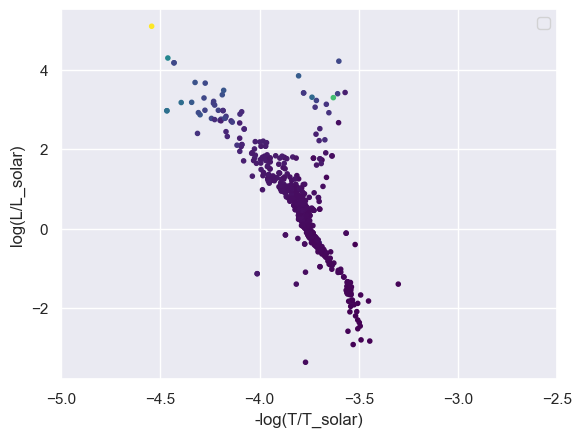

In [176]:
import seaborn as sns

sns.set(color_codes=True)
sns.kdeplot(fill=True)

plt.scatter(-1*np.log10(df_STAR['T_eff']),np.log10(df_STAR['Luminosity']),marker='.',c=df_STAR['Mass'],cmap='viridis')
plt.xlim(-5.0,-2.5)
plt.xlabel('-log(T/T_solar)')
plt.ylabel('log(L/L_solar)')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


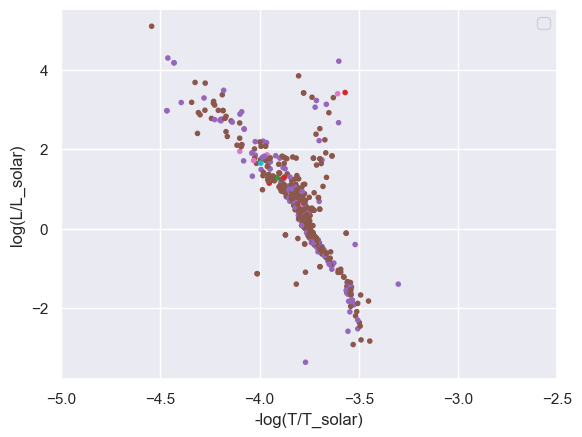

In [181]:
plt.scatter(-1*np.log10(df_STAR['T_eff']),np.log10(df_STAR['Luminosity']),marker='.',c=df_STAR['Metallicity'],cmap='tab10')
plt.xlim(-5.0,-2.5)
plt.xlabel('-log(T/T_solar)')
plt.ylabel('log(L/L_solar)')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


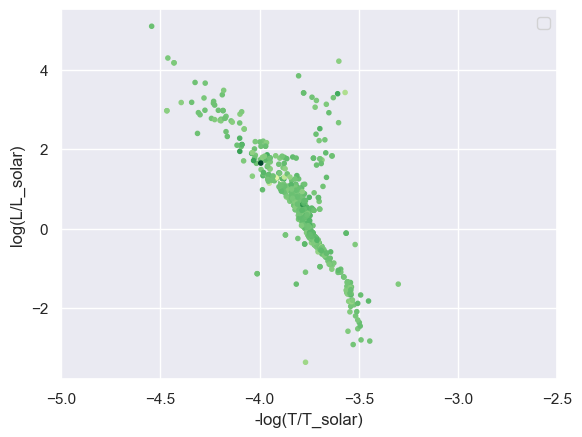

In [179]:
plt.scatter(-1*np.log10(df_STAR['T_eff']),np.log10(df_STAR['Luminosity']),marker='.',c=df_STAR['Metallicity'],cmap='YlGn')
plt.xlim(-5.0,-2.5)
plt.xlabel('-log(T/T_solar)')
plt.ylabel('log(L/L_solar)')
plt.legend()
plt.show()